# Wednesday morning

https://learning.nceas.ucsb.edu/2024-03-arctic/sections/geopandas.html

## Preprocessing the raster data


In [1]:
import urllib

url = 'https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A6b847ab0-9a3d-4534-bf28-3a96c5fa8d72'

# Ship traffic raster from Aug 2020, of a coastal subset of data w 1 km resolution
msg = urllib.request.urlretrieve(url, "Coastal_2020_08.tif")

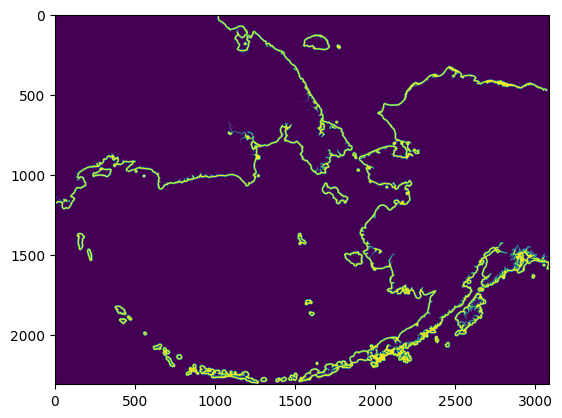

In [2]:
import rasterio
import matplotlib.pyplot as plt
import rasterio.mask
import numpy as np
import rasterio.plot

with rasterio.open("Coastal_2020_08.tif") as ship_con:
    # Read in just the first band of the raster
    ships = ship_con.read(1)
    # save the metadata too
    ships_meta = ship_con.profile

plt.imshow(ships)


In [3]:
ships_meta

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 3087, 'height': 2308, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(999.7994153462766, 0.0, -2550153.29233849,
       0.0, -999.9687691991521, 2711703.104608573), 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}

In [4]:
type(ships_meta)

rasterio.profiles.Profile

In [5]:
url = 'https://knb.ecoinformatics.org/knb/d1/mn/v2/object/urn%3Auuid%3A7c942c45-1539-4d47-b429-205499f0f3e4'

# Vector data for commercial fishing districts in Alaska
msg = urllib.request.urlretrieve(url, "Alaska_Commercial_Salmon_Boundaries.gpkg")

In [6]:
import geopandas as gpd

comm = gpd.read_file('Alaska_Commercial_Salmon_Boundaries.gpkg')

<Axes: >

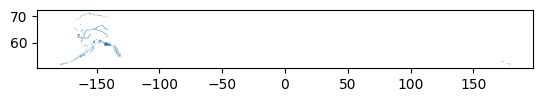

In [7]:
comm.plot()

In [8]:
comm.columns.values

array(['OBJECTID', 'GEOMETRY_START_DATE', 'GEOMETRY_END_DATE',
       'STAT_AREA', 'STAT_AREA_NAME', 'FISHERY_GROUP_CODE',
       'GIS_SERIES_NAME', 'GIS_SERIES_CODE', 'REGION_CODE',
       'REGISTRATION_AREA_NAME', 'REGISTRATION_AREA_CODE',
       'REGISTRATION_AREA_ID', 'REGISTRATION_LOCATION_ABBR',
       'MANAGEMENT_AREA_NAME', 'MANAGEMENT_AREA_CODE', 'DISTRICT_NAME',
       'DISTRICT_CODE', 'DISTRICT_ID', 'SUBDISTRICT_NAME',
       'SUBDISTRICT_CODE', 'SUBDISTRICT_ID', 'SECTION_NAME',
       'SECTION_CODE', 'SECTION_ID', 'SUBSECTION_NAME', 'SUBSECTION_CODE',
       'SUBSECTION_ID', 'COAR_AREA_CODE', 'CREATOR', 'CREATE_DATE',
       'EDITOR', 'EDIT_DATE', 'COMMENTS', 'STAT_AREA_VERSION_ID',
       'Shape_Length', 'Shape_Area', 'geometry'], dtype=object)

In [9]:
comm.head()

,OBJECTID,GEOMETRY_START_DATE,GEOMETRY_END_DATE,STAT_AREA,STAT_AREA_NAME,FISHERY_GROUP_CODE,GIS_SERIES_NAME,GIS_SERIES_CODE,REGION_CODE,REGISTRATION_AREA_NAME,...,COAR_AREA_CODE,CREATOR,CREATE_DATE,EDITOR,EDIT_DATE,COMMENTS,STAT_AREA_VERSION_ID,Shape_Length,Shape_Area,geometry
0,12,1975-01-01 00:00:00+00:00,NaT,33461,Tanana River mouth to Kantishna River,B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-A Section ...",None,4.610183,0.381977,"MULTIPOLYGON (((-151.32805 64.96913, -151.3150..."
1,13,1975-01-01 00:00:00+00:00,NaT,33462,Kantishna River to Wood River,B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-B Section ...",None,3.682421,0.321943,"MULTIPOLYGON (((-149.96255 64.70518, -149.9666..."
2,18,1978-01-01 00:00:00+00:00,NaT,33431,Toklik to Cottonwood Point,B,Salmon,B,3,Yukon Area,...,YL,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,Yukon District and 3 Subdistrict until 1/1/1980,None,2.215641,0.198740,"MULTIPOLYGON (((-161.39853 61.55463, -161.4171..."
3,19,1980-01-01 00:00:00+00:00,NaT,33442,"Right Bank, Bishop Rock to Illinois Creek",B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.179852,0.382788,"MULTIPOLYGON (((-153.15234 65.24944, -153.0761..."
4,20,1980-01-01 00:00:00+00:00,NaT,33443,"Left Bank, Cone Point to Illinois Creek",B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.500826,0.378262,"MULTIPOLYGON (((-152.99905 65.17027, -152.9897..."


In [10]:
comm['geometry'][:5]

0    MULTIPOLYGON (((-151.32805 64.96913, -151.3150...
1    MULTIPOLYGON (((-149.96255 64.70518, -149.9666...
2    MULTIPOLYGON (((-161.39853 61.55463, -161.4171...
3    MULTIPOLYGON (((-153.15234 65.24944, -153.0761...
4    MULTIPOLYGON (((-152.99905 65.17027, -152.9897...
Name: geometry, dtype: geometry

In [11]:
comm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

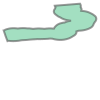

In [12]:
comm['geometry'][8]

<Axes: >

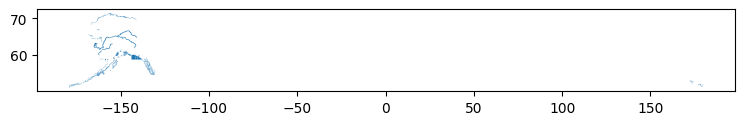

In [13]:
comm.plot(figsize = (9,9))

<Axes: >

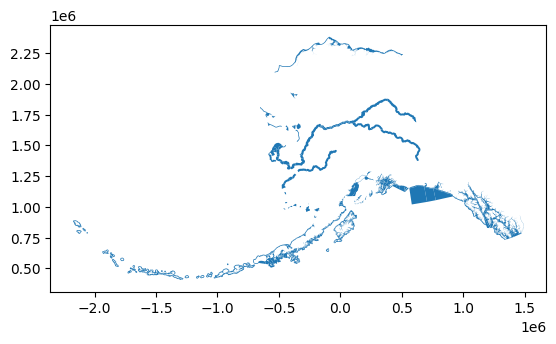

In [14]:
comm_3338 = comm.to_crs("EPSG:3338")

comm_3338.plot()

## Crop data to area of interest
### Create bounding box

In [15]:
from shapely.geometry import box

coord_box = box(-159.5, 55, -144.5, 62)

coord_box_df = gpd.GeoDataFrame(
    crs = 'EPSG:4326',
    geometry = [coord_box]).to_crs("EPSG:3338")

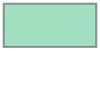

In [16]:
coord_box

### Extract a subset of the raster using a bounding box

In [17]:
with rasterio.open("Coastal_2020_08.tif") as ship_con1:
    shipc_arr, shipc_transform = rasterio.mask.mask(dataset = ship_con1,
                                                    shapes = coord_box_df["geometry"],
                                                    crop = True) # the mask
    
shipc_meta = ship_con1.meta # the profile is a little more detailed than meta, but meta is fine here

shipc_arr = shipc_arr[0,:,:]

# Turn no-data into NAN
shipc_arr[shipc_arr == ship_con1.nodata] = np.nan


In [18]:
shipc_arr

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0., nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [19]:
shipc_transform

Affine(999.7994153462766, 0.0, -351594.3779920279,
       0.0, -999.9687691991521, 1371744.9538817091)

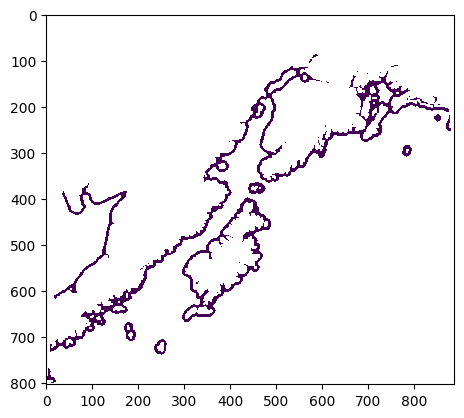

In [20]:
plt.imshow(shipc_arr)

In [21]:
shipc_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 3087,
 'height': 2308,
 'count': 1,
 'crs': CRS.from_epsg(3338),
 'transform': Affine(999.7994153462766, 0.0, -2550153.29233849,
        0.0, -999.9687691991521, 2711703.104608573)}

In [22]:
# This is messy and critical- even though the data is cropped, the metadata was not cropped
shipc_meta.update({"driver": "GTiff",
                 "height": shipc_arr.shape[0],
                 "width": shipc_arr.shape[1],
                 "transform": shipc_transform,
                 "compress": "lzw"})

In [23]:
shipc_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 888,
 'height': 804,
 'count': 1,
 'crs': CRS.from_epsg(3338),
 'transform': Affine(999.7994153462766, 0.0, -351594.3779920279,
        0.0, -999.9687691991521, 1371744.9538817091),
 'compress': 'lzw'}

### Extract a subset of the vector data using a bounding box

In [24]:
# select the fishing districts that are within the bounding box
comm_clip = gpd.sjoin(comm_3338, # sjoin is the spatial join
                      coord_box_df,
                      how='inner',
                      predicate='within')

### Check the extents

<Axes: >

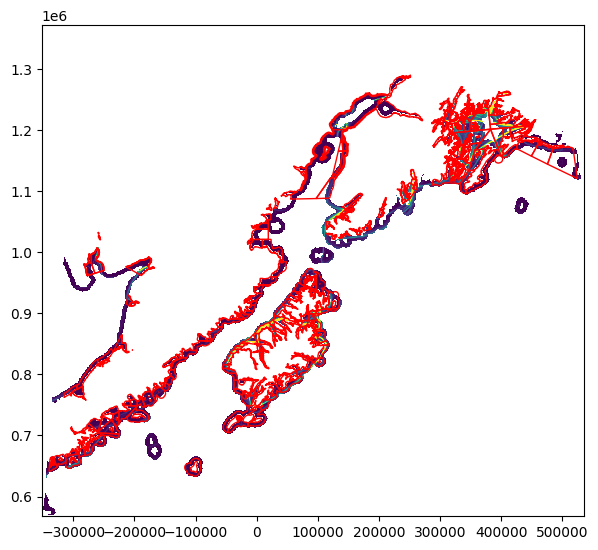

In [25]:
import rasterio.plot

# set up plot
fig, ax = plt.subplots(figsize=(7, 7))
# plot the raster
rasterio.plot.show(shipc_arr,
                   ax=ax,
                   vmin = 0,
                   vmax = 50000,
                   transform = shipc_transform)
# plot the vector
comm_clip.plot(ax=ax, facecolor='none', edgecolor='red')

### Calculate the total distance traveled per fishing area

In [26]:
from rasterio import features

# rasterize the 40th polygon, this represents one of the fishing districts
r40 = features.rasterize(comm_clip['geometry'][40].geoms,
                                    out_shape=shipc_arr.shape,
                                    transform=shipc_meta['transform'],
                                    all_touched=True) # Probably actually want all_touched=False, to not have a raster double-counted.

<Axes: >

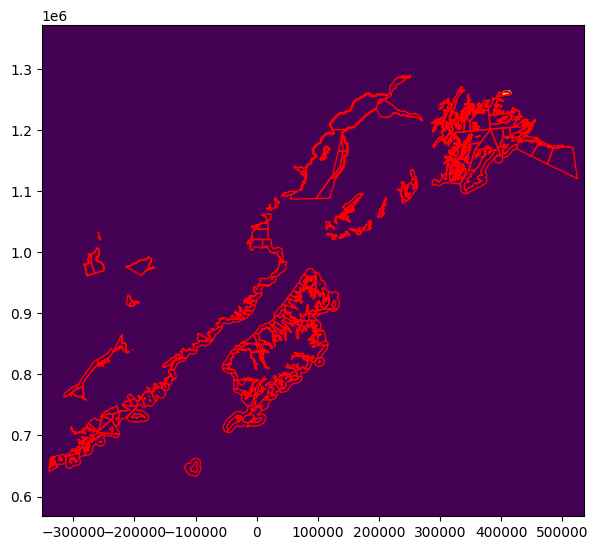

In [27]:
# set up plot
fig, ax = plt.subplots(figsize=(7, 7))

# plot the vectors of ALL the commercial fishing districts
comm_clip.plot(ax=ax, facecolor='none', edgecolor='red')

# plot the newly rasterized polygon
    # This is just ONE (the 40th) fishing district
rasterio.plot.show(r40,
                   ax=ax,
                   vmin = 0,
                   vmax = 1,
                   transform = shipc_meta['transform'])



In [28]:
np.unique(r40)

array([0, 1], dtype=uint8)

In [29]:
r40_index = np.where(r40 == 1)
print(r40_index)

(array([108, 108, 108, 108, 108, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111,
       111, 111, 111, 111, 112, 112, 112, 112, 112, 112, 112, 112, 112,
       112, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 113, 113,
       113, 113, 113, 113, 113, 113, 113, 113, 114, 114, 114, 114, 114,
       114, 114, 114, 114, 114, 114, 115, 115, 115, 115, 115, 115, 116]), array([759, 760, 762, 763, 764, 755, 756, 757, 758, 759, 761, 762, 763,
       764, 765, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763,
       764, 765, 766, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762,
       763, 764, 765, 766, 753, 754, 755, 756, 757, 758, 759, 760, 761,
       762, 763, 764, 765, 766, 767, 753, 754, 755, 756, 757, 758, 759,
       760, 761, 762, 763, 764, 765, 766, 767, 753, 754, 755, 756, 757,
       758, 759, 760, 761, 762, 763, 753, 754, 755, 756, 757,

In [30]:
np.nansum(shipc_arr[r40_index])

14369028.0

In [31]:

comm_clip['id'] = range(0,len(comm_clip))

In [32]:
distance_dict = {}
for geom, idx in zip(comm_clip['geometry'], comm_clip['id']):
    rasterized = features.rasterize(geom.geoms,
                                    out_shape=shipc_arr.shape,
                                    transform=shipc_meta['transform'],
                                    all_touched=True)

    r_index = np.where(rasterized == 1)
    distance_dict[idx] = np.nansum(shipc_arr[r_index])

In [33]:
import pandas as pd

# create a data frame from the result
distance_df = pd.DataFrame.from_dict(distance_dict,
                                     orient='index',
                                     columns=['distance'])

# extract the index of the data frame as a column to use in a join and convert distance to kilometers
distance_df['id'] = distance_df.index
distance_df['distance'] = distance_df['distance']/1000

In [34]:
# join the sums to the original data frame
res_full = comm_clip.merge(distance_df,
                           on = "id",
                           how = 'inner')

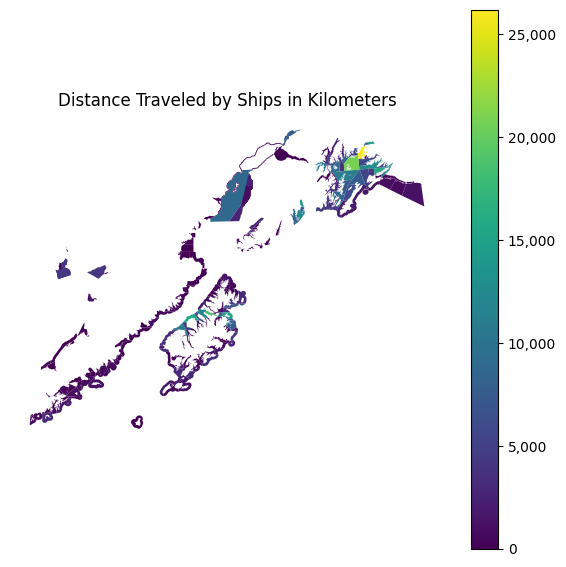

In [35]:
import matplotlib.ticker
fig, ax = plt.subplots(figsize=(7, 7))

ax = res_full.plot(column = "distance", legend = True, ax = ax)
fig = ax.figure
label_format = '{:,.0f}'
cb_ax = fig.axes[1]
ticks_loc = cb_ax.get_yticks().tolist()
cb_ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
cb_ax.set_yticklabels([label_format.format(x) for x in ticks_loc])
ax.set_axis_off()
ax.set_title("Distance Traveled by Ships in Kilometers")
plt.show()

In [36]:
reg_area = res_full.dissolve(by = "REGISTRATION_AREA_NAME", 
                             aggfunc = 'sum',
                             numeric_only = True)

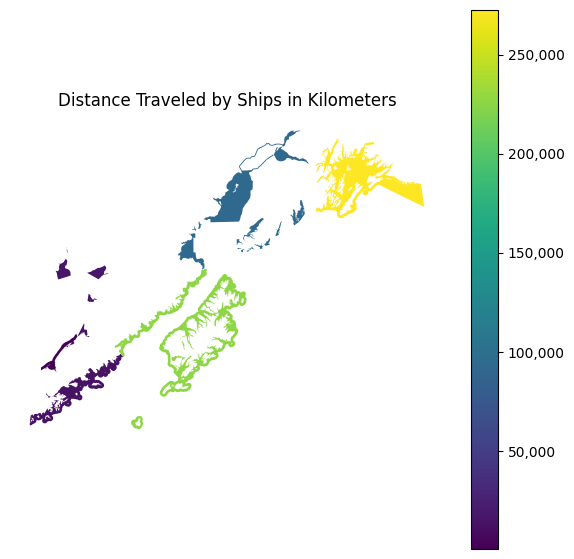

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))

ax = reg_area.plot(column = "distance", legend = True, ax = ax)
fig = ax.figure
label_format = '{:,.0f}'
cb_ax = fig.axes[1]
ticks_loc = cb_ax.get_yticks().tolist()
cb_ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
cb_ax.set_yticklabels([label_format.format(x) for x in ticks_loc])
ax.set_axis_off()
ax.set_title("Distance Traveled by Ships in Kilometers")
plt.show()